In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import mydef

In [34]:
raw_df = pd.read_csv('./data/HepatitisCdata.csv')
df = raw_df.copy()

In [35]:
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


In [37]:
mydef.draw_missing_data_table(df)

,index,Total,Percent (%)
0,Unnamed: 0,0,0.00
1,Category,0,0.00
2,Age,0,0.00
3,Sex,0,0.00
4,ALB,1,0.16
5,ALP,18,2.93
6,ALT,1,0.16
7,AST,0,0.00
8,BIL,0,0.00
9,CHE,0,0.00


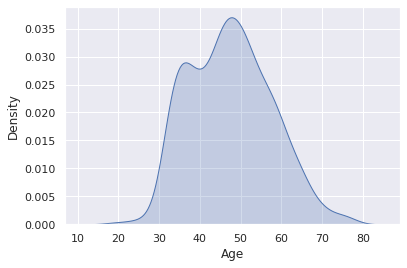

In [38]:
sns.set_theme()
sns.kdeplot(data = df, x = 'Age', shade =True);

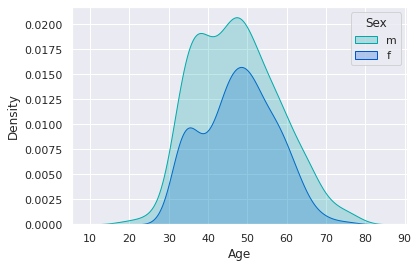

In [39]:
sns.kdeplot(data = df, x = 'Age', hue ='Sex', shade =True, palette ='winter_r');

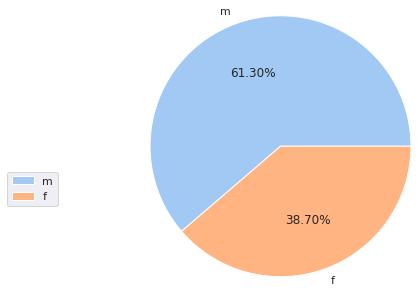

In [40]:
mydef.draw_pie(df['Sex'])

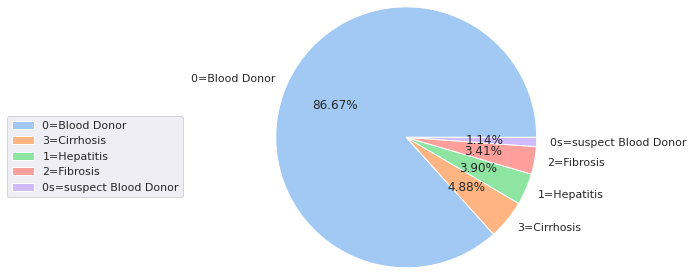

In [41]:
mydef.draw_pie(df['Category'])

In [42]:
df['Category'] =df['Category'].map(
    {'0=Blood Donor':0, '0s=suspect Blood Donor':0,
    '1=Hepatitis': 1, '2=Fibrosis':1, '3=Cirrhosis':1
    })

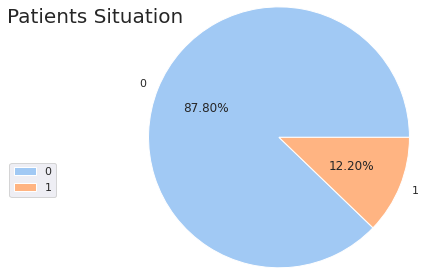

In [43]:
mydef.draw_pie(df['Category'], name="Patients Situation")

In [44]:
df['Sex'] = df['Sex'].map({'f':0, 'm':1})

In [45]:
move = df['Sex']
df =df.drop('Sex', axis =1)
df.insert( 2, 'Sex', move)
df.head()

,Unnamed: 0,Category,Sex,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0,1,32,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0,1,32,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0,1,32,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0,1,32,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0,1,32,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [46]:
# My headmap function only draw float64 type
df_copy = df.copy()
list_int_df_copy = list(df_copy.select_dtypes(include='int64').columns)
df_copy[list_int_df_copy] = df_copy[list_int_df_copy].astype('float64') 

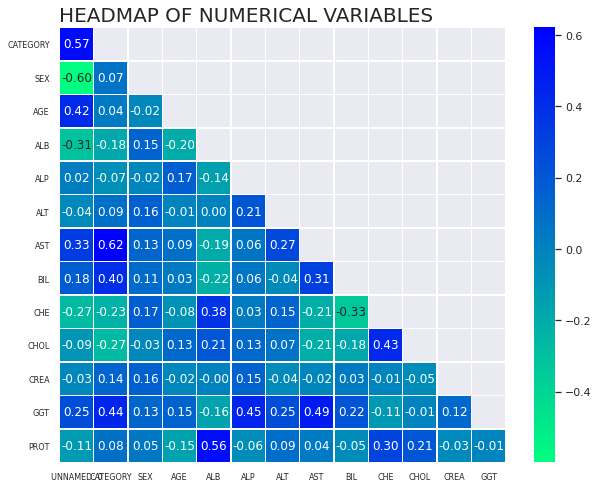

In [47]:
mydef.draw_head_map(df_copy)

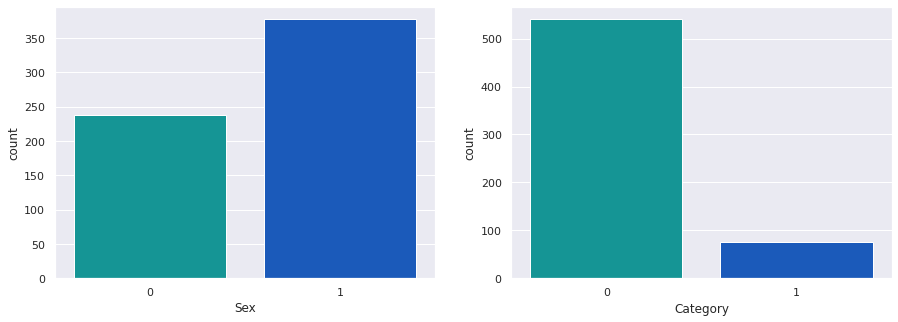

In [48]:
mydef.draw_multiple_categorical_chart(df[['Sex','Category']])

In [49]:
mydef.draw_multiple_numerical_chart(df, hue='Sex',type_of_chart='his')

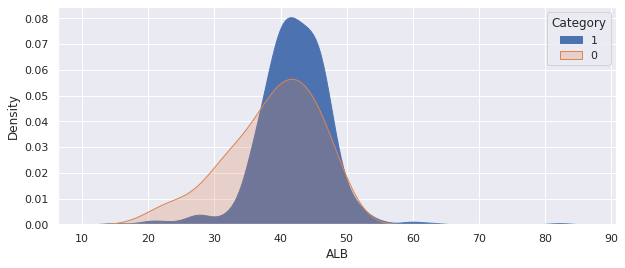

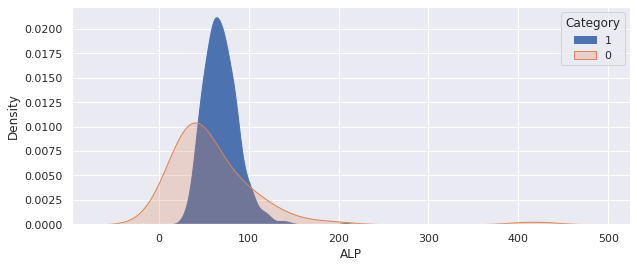

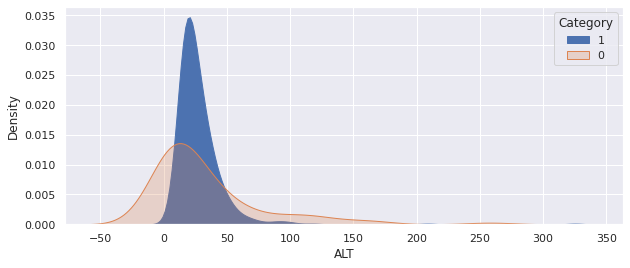

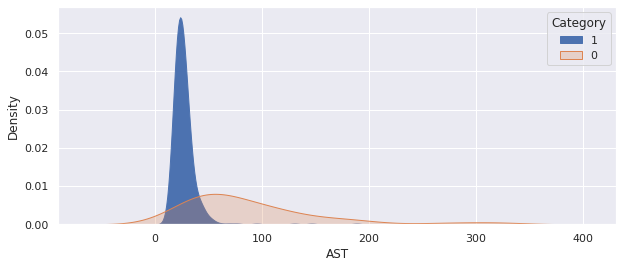

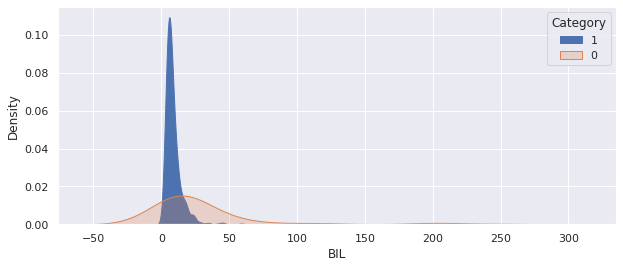

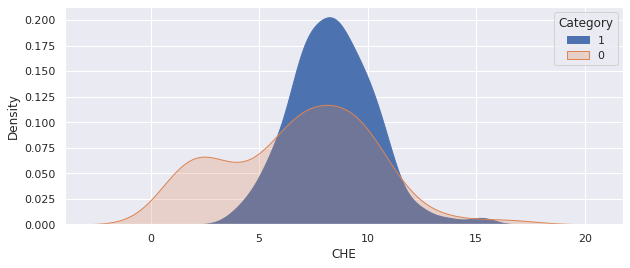

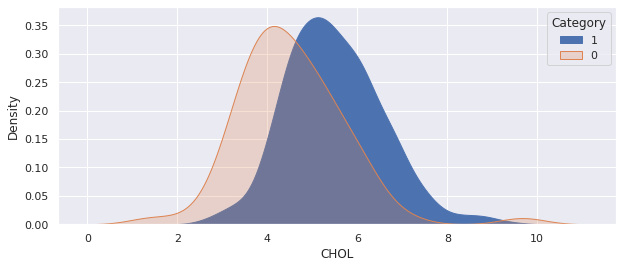

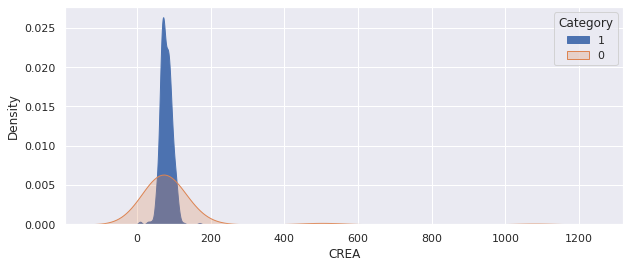

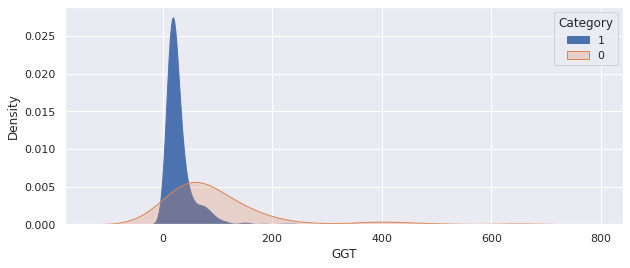

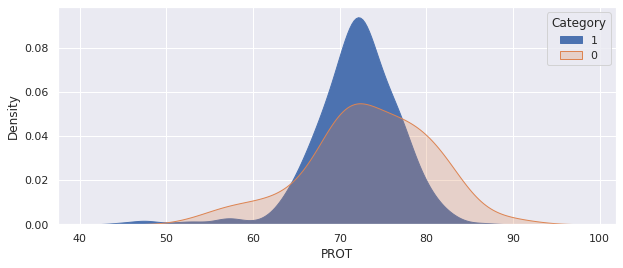

In [ ]:
mydef.draw_multiple_numerical_chart(df, hue='Category', type_of_chart='kde')

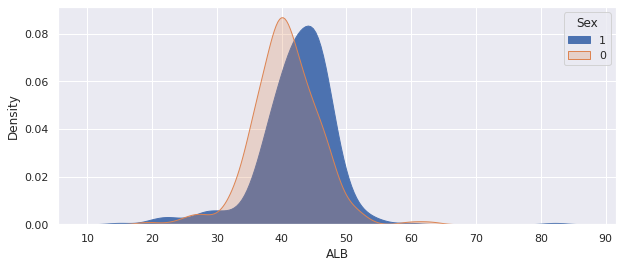

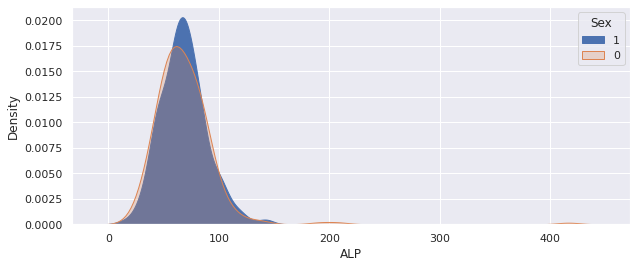

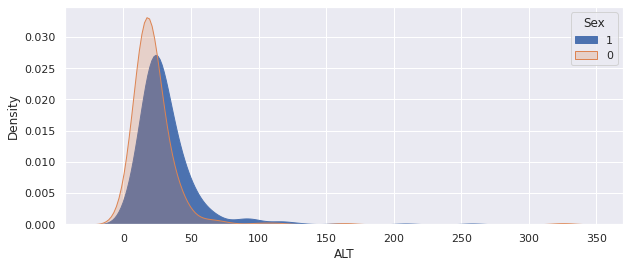

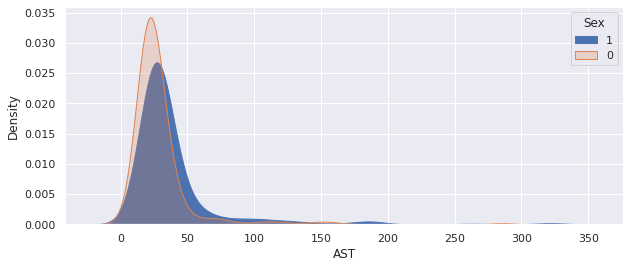

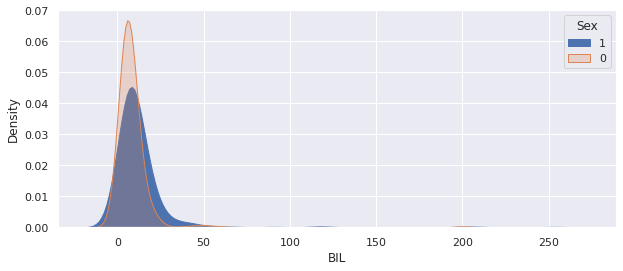

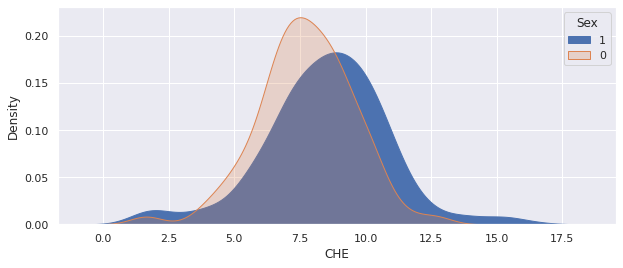

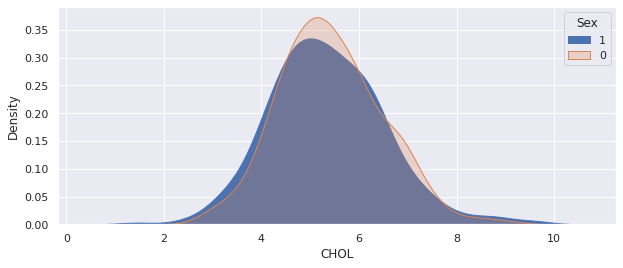

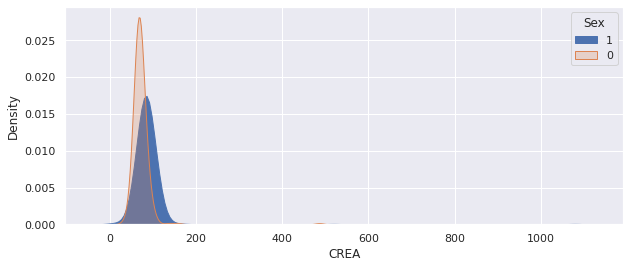

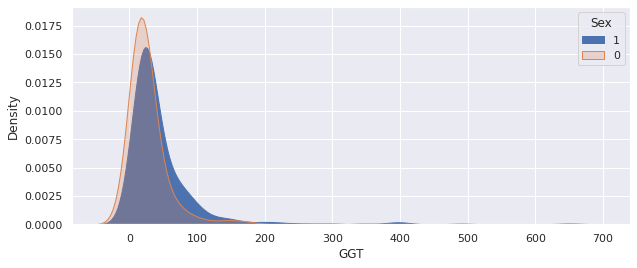

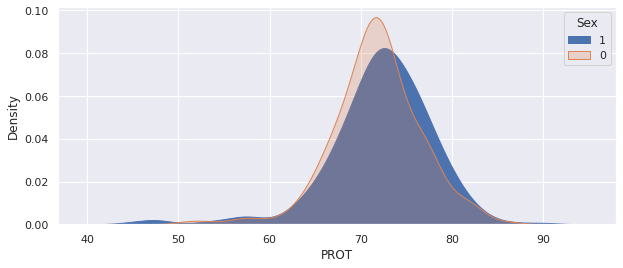

In [ ]:
mydef.draw_multiple_numerical_chart(df, hue='Sex', type_of_chart='kde')

In [ ]:
df = mydef.fill_missing_data(df)
mydef.draw_missing_data_table(df)

,index,Total,Percent (%)
0,Unnamed: 0,0,0.0
1,Category,0,0.0
2,Sex,0,0.0
3,Age,0,0.0
4,ALB,0,0.0
5,ALP,0,0.0
6,ALT,0,0.0
7,AST,0,0.0
8,BIL,0,0.0
9,CHE,0,0.0


In [ ]:
x = df.drop(['Category', 'Unnamed: 0'],axis=1).values
y = df['Category'].values

## 1.Encode Categorical Data

### 1.1 Encode Independent variable(x)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


### 1.2: Encode Dependent Variable(y)

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# y = LabelEncoder().fit_transform(y)

## 2.Using SMOTE to balance the Data

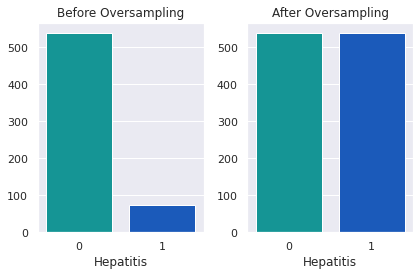

In [ ]:
x, y = mydef.SMOTE(x,y, xlabel_name='Hepatitis')

## 3.Splitting the dataset (x=data, y =output) into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.3)

In [ ]:
print(x.shape)
print(x_train.shape)
print(x_test.shape)

(1080, 12)
(756, 12)
(324, 12)


## 4.Feature Scaling by  Normalizer

In [ ]:
from sklearn.preprocessing import Normalizer
x_train[:, 1:] = Normalizer().fit_transform(x_train[:, 1:])
x_test[:, 1:] = Normalizer().fit_transform(x_test[:, 1:])

In [ ]:
print(x_train[0])
print('---------------------------------')
print(x_test[0])

[1.         0.33060011 0.34626012 0.37410013 0.10034003 0.12296004
 0.10962004 0.07000602 0.02302601 0.61480021 0.08758003 0.45008015]
---------------------------------
[0.         0.3489725  0.29922536 0.48262155 0.10023678 0.11285919
 0.04751966 0.05316262 0.03378351 0.51974628 0.12251162 0.49153149]


# Train module

In [ ]:
mydef.score_module_classifier(x_train, y_train, x_test, y_test)

[10:47:51] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB Classifier
Confusion Matrix:
[[166   6]
 [  1 151]]
Accuracy :  98.0
Recall :  99.0
Precision :  96.0
---------------------------------
Random Forest
Confusion Matrix:
[[166   6]
 [  1 151]]
Accuracy :  98.0
Recall :  99.0
Precision :  96.0
---------------------------------
LGBM Classifier
Confusion Matrix:
[[169   3]
 [  1 151]]
Accuracy :  99.0
Recall :  99.0
Precision :  98.0
---------------------------------
K-Nearest Neighbours
Confusion Matrix:
[[163   9]
 [  4 148]]
Accuracy :  96.0
Recall :  97.0
Precision :  94.0
---------------------------------
SGD Classifier
Confusion Matrix:
[[161  11]
 [  6 146]]
Accuracy :  95.0
Recall :  96.0
Precision :  93.0
---------------------------------
SVC
Confusion Matrix:
[[166   6]
 [ 10 142

In [ ]:
features = list(df.columns.drop(['Unnamed: 0', 'Category']))
features

['Sex',
 'Age',
 'ALB',
 'ALP',
 'ALT',
 'AST',
 'BIL',
 'CHE',
 'CHOL',
 'CREA',
 'GGT',
 'PROT']

In [ ]:
x.shape

(1080, 12)

[XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None), 'XGB Classifier']
Old Shape: (1080, 12) New shape: (1080, 2)




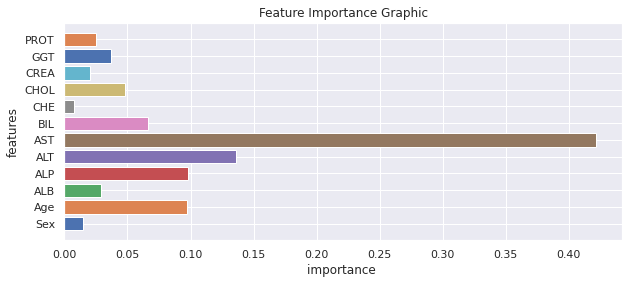

[RandomForestClassifier(random_state=1), 'Random Forest']
Old Shape: (1080, 12) New shape: (1080, 4)




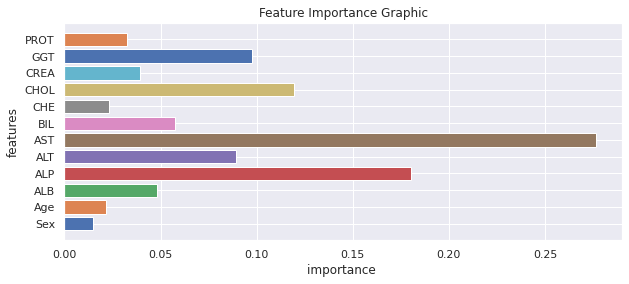

[LGBMClassifier(random_state=1), 'LGBM Classifier']
Old Shape: (1080, 12) New shape: (1080, 5)




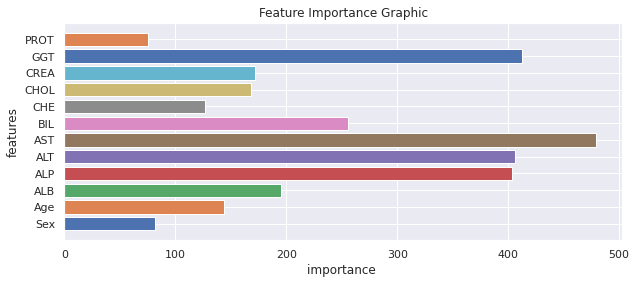

[DecisionTreeClassifier(random_state=1), 'Decision Tree Classifier']
Old Shape: (1080, 12) New shape: (1080, 2)




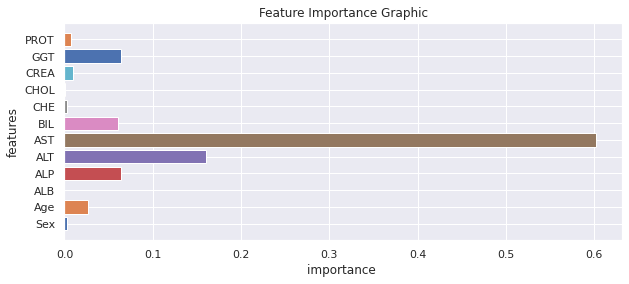

In [ ]:
mydef.draw_important_feature(features=features, x =x, y = y, x_train =x_train, y_train =y_train)